# DataLab

## Koulutus: 23.11.2021

# Aihe: klusterointi K-means -algoritmillä ja mallinvalinta

Tässä työkirjassa käsittelemme K-means rymittelyalgoritmia. Esimerkkinä käytämme THL:n julkaisemaa terveysdataa, joka on materiaalin mukana ja entuudestaan tuttu muista harjoituksista.

In [1]:
# Ladataan peruskirjastot eli Numpy ja Pandas:
import numpy as np
import pandas as pd

# Visualisointikirjasto Matplotlib ladataan seuraavaksi:
import matplotlib.pyplot as plt

# Datan normalisointirutiinit:
from sklearn.preprocessing import StandardScaler

# K-means kluserointialgoritmi:
from sklearn.cluster import KMeans

# Eräs klusteroinnin hyvyysfunktio, jolla voi
# arvioida klusterien määrän sopivuutta datalle:
from sklearn.metrics import silhouette_score

Käytämme THL:n julkaisemaa datatiedostoa "THL_MyData2016_hackathon_dataset.xls", joka on saatavilla THL:n kotisivuilta osoitteesta https://thl.fi/en/web/thlfi-en/statistics/statistical-databases/open-data/thl-and-hackathons

Tiedosto löytyy myös työkirjojen kanssa samassa hakemistossa.

In [2]:
health_data = pd.read_excel("THL_MyData2016_hackathon_dataset.xls")

In [3]:
type(health_data)

pandas.core.frame.DataFrame

In [4]:
health_data.columns

Index(['ikalk', 'sp', 'bmi', 'systbp2', 'diastbp2', 'kol', 'kol_hdl',
       'Fx_plus', 'Fx'],
      dtype='object')

In [5]:
numeric_health_data = health_data[['bmi','systbp2', 'diastbp2','kol','kol_hdl']]

In [6]:
type(numeric_health_data)

pandas.core.frame.DataFrame

In [7]:
numeric_health_data.describe()

,bmi,systbp2,diastbp2,kol,kol_hdl
count,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
mean,27.109074,132.042912,78.334268,5.270606,1.482348
std,4.506711,17.805731,10.534951,0.995119,0.362748
min,16.530000,88.000000,45.770000,2.550000,0.700000
25%,23.940000,120.000000,72.000000,4.567500,1.220000
50%,26.540000,130.000000,78.000000,5.235000,1.440000
75%,29.707500,142.000000,86.000000,5.912500,1.710000
max,45.180000,200.630000,109.370000,8.830000,2.850000


In [8]:
# Lasketaan datan keskiarvo eli tavallaan "yksi klusteri":
keskiarvo = numeric_health_data.mean()
print(keskiarvo)

# poimitaan ensimmäisen muuttujan eli BMI:n keskiarvo esimerkin vuoksi:
keskiarvo[0]

bmi          27.109074
systbp2     132.042912
diastbp2     78.334268
kol           5.270606
kol_hdl       1.482348
dtype: float64


27.109074074074098

In [9]:
# Lasketaan datan rivien ja sarakkeiden määrä:

n_rivit, n_sarakkeet = numeric_health_data.shape
print("Rivejä: {0}".format(n_rivit))
print("Sarakkeita eli muuttujia: {0}".format(n_sarakkeet))

Rivejä: 1188
Sarakkeita eli muuttujia: 5


## Terveysdatan klusterointi K-means -algoritmilla

Klusteroimme seuraavaksi THL:n julkaiseman terveysdata-aineiston.

Normalisoimme ensin muuttujat niin, että jokainen muuttuja saa samanlaisen painon analyysissä. Normalisoi joka sarake eli muuttuja niin, että sarakkeen keskiarvo on 0 vähentämällä jokaisesta arvosta sarakkeen keskiarvo. Sen jälkeen jaa kaikki sarakkeen arvot sarakkeen keskihajonnalla. Näin saat sarakkeista satunnaisuuttujia, joiden keskiarvo on 0 ja keskihajonta 1. Tällainen datan normalisointi pakottaa muuttujat samalle asteikolle.

Klusteroi data k-means -algortimilla, jonka löydät scikit-learn -paketista. 

Tutustu dokumentaatioon: https://scikit-learn.org/stable/modules/clustering.html

## Datan normalisointi

In [10]:
# Normalisoidaan data käyttäen kirjastofunktiota:

# Luodaan normalisointiobjekti eli muuttuja:
my_scaler = StandardScaler()

# Lasketaan normalisoinnissa tarvittavat parametrit:
my_scaler = my_scaler.fit(numeric_health_data)

# Normalisoidaan data käyttäen näitä parametreja:
normalized_health_data = my_scaler.transform(numeric_health_data)

# Nyt data on normalisoitu!

## K-means klusterointi

K-means algoritmi esittää klusterit ikäänkuin paikallisina keskiarvovektoreina, eli klusterikeskukset sisältävät samanlaisia vektoreita kuin datavektorit ovat.

[[ 1.88459034  1.76929095  1.51638039  1.7342197   1.77061995]
 [-0.35955313 -0.31605167 -0.24116911 -0.29864779 -0.33048394]
 [ 0.54747195  0.52100674  0.64193221  0.62342293  0.54318436]
 [-1.17083451 -1.14714065 -1.30360196 -1.2986002  -1.1525371 ]]


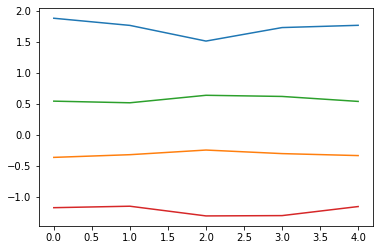

In [11]:
# Luodaan K-Means mallin objekti:
kmeans_model = KMeans(n_clusters=4)

# Opitaan malli datasta:
kmeans_model.fit(normalized_health_data)

# Jaetaan data klustereiden mukaisiin ryhmiin:
kmeans_ryhmat = kmeans_model.predict(normalized_health_data)

# Katsotaan klusterin keskipisteitä eli prototyyppejä:
print(kmeans_model.cluster_centers_)

# Esitetään klusterikeskukset kuvaajassa: 
plt.plot(kmeans_model.cluster_centers_.T)

## Mallinvalinta käyttäen Silhouette-menetelmää

Kokeile jotain mallinvalintaan soveltuvaa mittaa, esim. Silhouette-menetelmää. Tällainen mallinvalintamitta kertoo jonkunlaisen hyvyysarvion annetulle klusteroinnille ja klustereiden määrälle.

Tee klusterimallit eri määrille klustereita (esim 2,3,4,..,20) ja mittaa jokaisen ratkaisun hyvyyttä Silhoutte-menetelmällä. Visualisoi Silhoutte-indeksin eri arvot klustereiden määrän funcktiona (klustereiden määrä x-akselille, silhouette-indeksi y-akselille). Tällöin täytyy klusterointi tehdä uudestaan uudelle määrälle klustereita.

Katso silhouette -funktion dokumentaatiota osoitteessa:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html 

In [12]:
# Lasketaan yksi Silhouette-arvo tälle klusteroinnille:
silhouette_arvo = silhouette_score(normalized_health_data, kmeans_ryhmat)
print(silhouette_arvo)

0.36433266890196125


## Klusteroi jokin muu tai joku oma datajoukko

Lataa joku data opituista datalähteistä ja klusteroi se samalla tavalla. Normalisoi muuttujat ennen klusterointia, klusteroi ja käytä mallinvalintakriteeriä. Voit käyttää esim. scikit-learnistä löytyviä datajoukkoja. 

Ohjeita datajoukkojen lataamiseen köydät täältä: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets